In [2]:
from IPython.display import Audio
import librosa
import librosa.display

In [3]:
y,sr = librosa.load("hemant speech 2.wav")

In [4]:
Audio(y,rate = sr)

In [5]:
print(sr)

22050


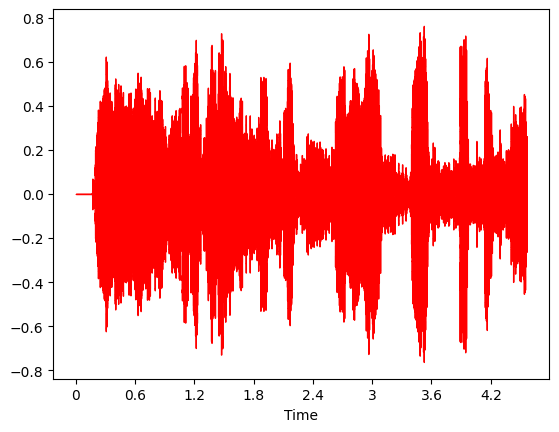

In [6]:
librosa.display.waveshow(y,color = 'red')

In [7]:
N = 1102 # number of samples taken in 50 ms. 1s -> 22050 samples. 50 ms -> 1102 samples
Ek = []  #continuos average energy
for k in range(len(y)-N+1):
    sum = 0
    for i in range(k,N+k):
        sum += y[i]*y[i]
    Ek.append((1/N)*sum)

In [8]:
import numpy as np
Ek_arr = np.array(Ek)
print(Ek_arr)

[0.         0.         0.         ... 0.02161139 0.02160366 0.02158687]


In [9]:
import statistics
Em = []
mean = statistics.mean(Ek_arr)
var = statistics.variance(Ek_arr)
for i in range(len(Ek_arr)):
    Em.append((Ek_arr[i] - mean)/var)
Em_arr = np.array(Em)

In [10]:
print(Em_arr)

[-34.26621941 -34.26621941 -34.26621941 ...  -9.38640631  -9.39529511
  -9.41463258]


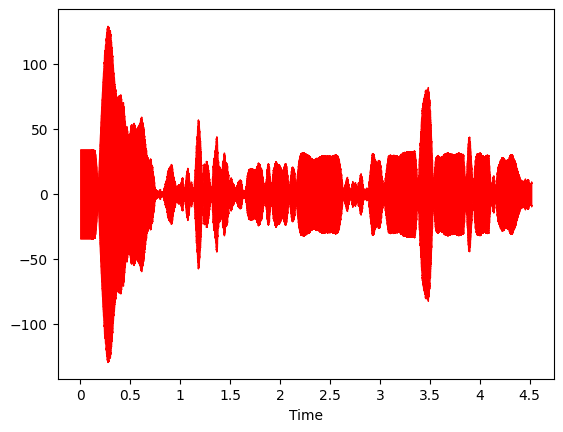

In [11]:
librosa.display.waveshow(Em_arr,color = 'red')

In [12]:
Audio(Em_arr,rate = sr)

In [28]:
zero_crossings = librosa.zero_crossings(Em_arr, pad=False)

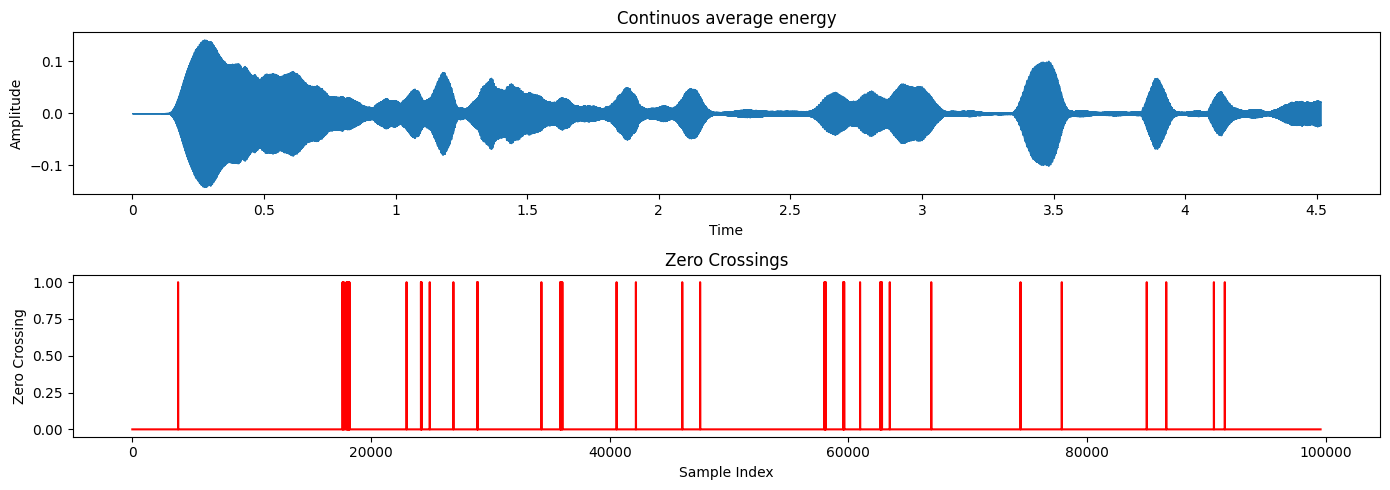

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(Ek_arr, sr=sr)
plt.title('Continuos average energy')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot the zero crossings
plt.subplot(2, 1, 2)
plt.plot(zero_crossings, color='r')
plt.title('Zero Crossings')
plt.xlabel('Sample Index')
plt.ylabel('Zero Crossing')
plt.tight_layout()
plt.show()